In [1]:
import numpy as np
import pandas as pd
import io
import os
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling  import RandomOverSampler
from imblearn.ensemble import BalancedRandomForestClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path =  'drive/MyDrive/SelfAssessment/Employee Mental Workload Survey.xlsx'
df = pd.read_excel(path)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Timestamp,Age,Gender,Nationality,Highest Education Level,Company,Department,Income,How long have you been with this company?,I have a safe work environment,...,I do not have enough technology skill to perform my task,I need to spend long time to learning and applying new technologies,I do not have enough time to study and improve my technological skills,I am threatened by co-workers with more recent technological skills,I feel that I have a greater workload due to the complexity of the technology used,I feel that I experience high mental workload,I am not satisfied with my work performance,I feel that I have faced stress due to my workload,I cannot sleep properly because I am worrying about my workload,I cannot enjoy my life due to my workload
0,2021-12-21 10:41:22.895,20 - 25 years old,Male,Malaysian,Bachelor’s degree,Soft Rock Technologies Sdn. Bhd.,Development,< RM 1000,Less than 1 year,5,...,3,4,4,3,4,4,3,4,4,4
1,2021-12-21 10:48:10.932,20 - 25 years old,Female,Malaysian,Bachelor’s degree,SOFT ROCK TECHNOLOGIES SDN. BHD.,HR & ADMINISTRATIVE,< RM 1000,Less than 1 year,5,...,3,3,2,2,2,2,3,3,2,2
2,2021-12-21 11:48:00.106,20 - 25 years old,Male,Malaysian,Bachelor’s degree,Soft Rock Technologies,Software Department,< RM 1000,Less than 1 year,5,...,4,4,2,3,3,3,3,3,3,2
3,2022-01-20 22:57:38.825,26 - 30 years old,Male,Malaysian,Bachelor’s degree,Soft Rock Technologies Sdn. Bhd.,Software Department,RM 2000 - RM 2999,3 - 5 years,4,...,1,2,3,2,2,3,3,2,2,2
4,2022-01-27 10:29:47.429,20 - 25 years old,Male,Malaysian,Bachelor’s degree,OCBC Bank,Operation & Technology,RM 2000 - RM 2999,1 - 2 years,4,...,1,2,2,2,2,2,2,3,2,2
5,2022-01-27 11:18:31.616,26 - 30 years old,Female,Malaysian,Master’s degree,Ideal vision integration Sdn bhd,Vision,RM 3000 - RM 3999,3 - 5 years,3,...,2,2,2,3,3,3,3,3,2,3
6,2022-01-27 11:22:34.578,20 - 25 years old,Female,Malaysian,Bachelor’s degree,Micron Memory Malaysia SDN BHD,NAND Test Solutions Engineer,RM 3000 - RM 3999,Less than 1 year,4,...,4,5,5,4,5,4,5,5,4,5
7,2022-01-27 11:23:49.327,26 - 30 years old,Female,Malaysian,Master’s degree,Dell,Tech support,RM 3000 - RM 3999,3 - 5 years,5,...,4,3,1,1,1,5,5,5,5,5
8,2022-01-27 11:26:18.866,26 - 30 years old,Male,Malaysian,Master’s degree,ViTrox Technologies Sdn Bhd,Center of Excellence,≥ RM 5000,3 - 5 years,2,...,2,5,4,4,5,4,3,4,2,2
9,2022-01-27 11:52:40.140,20 - 25 years old,Male,Malaysian,Master’s degree,Hp manufacturing,Product Engineering,RM 4000 - RM 4999,Less than 1 year,5,...,1,2,2,1,1,1,1,2,1,1


In [3]:
df_pruned = df.drop(df.columns[[0,1,2,3,4,5,6,7,8]], axis = 1)
df_pruned

,I have a safe work environment,I work in a clean and tidy environment,Tools and equipments provided in the workplace are adequate and safe,My workplace has adequate lighting,My workplace is noisy,My job affects me a lot emotionally,My job makes me nervous,My work is affecting my health,I often feel very tired after work,I am feeling discouraged in my job,...,I do not have enough technology skill to perform my task,I need to spend long time to learning and applying new technologies,I do not have enough time to study and improve my technological skills,I am threatened by co-workers with more recent technological skills,I feel that I have a greater workload due to the complexity of the technology used,I feel that I experience high mental workload,I am not satisfied with my work performance,I feel that I have faced stress due to my workload,I cannot sleep properly because I am worrying about my workload,I cannot enjoy my life due to my workload
0,5,4,4,4,3,4,4,3,4,3,...,3,4,4,3,4,4,3,4,4,4
1,5,5,4,3,2,3,4,3,4,3,...,3,3,2,2,2,2,3,3,2,2
2,5,5,5,5,3,4,4,2,4,2,...,4,4,2,3,3,3,3,3,3,2
3,4,4,4,4,2,3,3,2,2,2,...,1,2,3,2,2,3,3,2,2,2
4,4,5,5,5,2,3,2,2,3,2,...,1,2,2,2,2,2,2,3,2,2
5,3,3,3,3,3,3,3,3,3,3,...,2,2,2,3,3,3,3,3,2,3
6,4,2,3,2,1,5,5,4,5,4,...,4,5,5,4,5,4,5,5,4,5
7,5,5,5,5,5,5,5,4,5,5,...,4,3,1,1,1,5,5,5,5,5
8,2,4,4,4,4,4,4,3,5,4,...,2,5,4,4,5,4,3,4,2,2
9,5,5,5,5,5,3,1,1,4,1,...,1,2,2,1,1,1,1,2,1,1


In [4]:
for column in df_pruned:
    ind = df_pruned.columns.get_loc(column)
    if (ind in range(0, 4)):
        df_pruned[column] = df_pruned[column].replace([1],"Very High")
        df_pruned[column] = df_pruned[column].replace([2],"High")
        df_pruned[column] = df_pruned[column].replace([3],"Balanced")
        df_pruned[column] = df_pruned[column].replace([4],"Low")
        df_pruned[column] = df_pruned[column].replace([5],"Very Low")

df_pruned

,I have a safe work environment,I work in a clean and tidy environment,Tools and equipments provided in the workplace are adequate and safe,My workplace has adequate lighting,My workplace is noisy,My job affects me a lot emotionally,My job makes me nervous,My work is affecting my health,I often feel very tired after work,I am feeling discouraged in my job,...,I do not have enough technology skill to perform my task,I need to spend long time to learning and applying new technologies,I do not have enough time to study and improve my technological skills,I am threatened by co-workers with more recent technological skills,I feel that I have a greater workload due to the complexity of the technology used,I feel that I experience high mental workload,I am not satisfied with my work performance,I feel that I have faced stress due to my workload,I cannot sleep properly because I am worrying about my workload,I cannot enjoy my life due to my workload
0,Very Low,Low,Low,Low,3,4,4,3,4,3,...,3,4,4,3,4,4,3,4,4,4
1,Very Low,Very Low,Low,Balanced,2,3,4,3,4,3,...,3,3,2,2,2,2,3,3,2,2
2,Very Low,Very Low,Very Low,Very Low,3,4,4,2,4,2,...,4,4,2,3,3,3,3,3,3,2
3,Low,Low,Low,Low,2,3,3,2,2,2,...,1,2,3,2,2,3,3,2,2,2
4,Low,Very Low,Very Low,Very Low,2,3,2,2,3,2,...,1,2,2,2,2,2,2,3,2,2
5,Balanced,Balanced,Balanced,Balanced,3,3,3,3,3,3,...,2,2,2,3,3,3,3,3,2,3
6,Low,High,Balanced,High,1,5,5,4,5,4,...,4,5,5,4,5,4,5,5,4,5
7,Very Low,Very Low,Very Low,Very Low,5,5,5,4,5,5,...,4,3,1,1,1,5,5,5,5,5
8,High,Low,Low,Low,4,4,4,3,5,4,...,2,5,4,4,5,4,3,4,2,2
9,Very Low,Very Low,Very Low,Very Low,5,3,1,1,4,1,...,1,2,2,1,1,1,1,2,1,1


In [5]:
for column in df_pruned:
    ind = df_pruned.columns.get_loc(column)
    if (ind in range(0, 4)):
        df_pruned[column] = df_pruned[column].replace(["Very High"], 5)
        df_pruned[column] = df_pruned[column].replace(["High"], 4)
        df_pruned[column] = df_pruned[column].replace(["Balanced"], 3)
        df_pruned[column] = df_pruned[column].replace(["Low"], 2)
        df_pruned[column] = df_pruned[column].replace(["Very Low"], 1)

df_cleaned = df_pruned

In [6]:
average_dv = []

for ind in df_cleaned.index:
    value = df_cleaned[df_cleaned.columns[-5]][ind] + df_cleaned[df_cleaned.columns[-4]][ind] + df_cleaned[df_cleaned.columns[-3]][ind] + df_cleaned[df_cleaned.columns[-2]][ind] + df_cleaned[df_cleaned.columns[-1]][ind]
    average_value = round(value/5)
    average_dv.append(average_value)
    
df_cleaned.drop(df.columns[[-1, -2, -3, -4, -5]], axis = 1, inplace = True)
df_cleaned['Average DV'] = average_dv


df_cleaned

,I have a safe work environment,I work in a clean and tidy environment,Tools and equipments provided in the workplace are adequate and safe,My workplace has adequate lighting,My workplace is noisy,My job affects me a lot emotionally,My job makes me nervous,My work is affecting my health,I often feel very tired after work,I am feeling discouraged in my job,...,My job involves a lot of responsibility,My mistakes could have serious consequences,I need to give very precise responses to my superior and colleague,I need to maintain a high level of attention during work,I do not have enough technology skill to perform my task,I need to spend long time to learning and applying new technologies,I do not have enough time to study and improve my technological skills,I am threatened by co-workers with more recent technological skills,I feel that I have a greater workload due to the complexity of the technology used,Average DV
0,1,2,2,2,3,4,4,3,4,3,...,4,4,4,4,3,4,4,3,4,4
1,1,1,2,3,2,3,4,3,4,3,...,3,3,3,4,3,3,2,2,2,2
2,1,1,1,1,3,4,4,2,4,2,...,5,4,5,5,4,4,2,3,3,3
3,2,2,2,2,2,3,3,2,2,2,...,4,4,5,5,1,2,3,2,2,2
4,2,1,1,1,2,3,2,2,3,2,...,4,5,3,4,1,2,2,2,2,2
5,3,3,3,3,3,3,3,3,3,3,...,3,2,4,3,2,2,2,3,3,3
6,2,4,3,4,1,5,5,4,5,4,...,5,5,5,5,4,5,5,4,5,5
7,1,1,1,1,5,5,5,4,5,5,...,5,3,5,4,4,3,1,1,1,5
8,4,2,2,2,4,4,4,3,5,4,...,2,2,4,2,2,5,4,4,5,3
9,1,1,1,1,5,3,1,1,4,1,...,4,3,4,4,1,2,2,1,1,1


In [7]:
X = df_cleaned.iloc[:, :-1].values
y = df_cleaned.iloc[:,30].values

n_samples, n_features = X.shape

print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 57
Number of features: 30


In [8]:
list(y).count(1), list(y).count(2), list(y).count(3), list(y).count(4), list(y).count(5)

(6, 24, 14, 9, 4)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                     test_size= 0.25, 
                     stratify= y,
                     random_state= 123)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (42, 30)
X_test shape: (15, 30)


In [10]:
ros = RandomOverSampler(random_state=3)
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)

In [11]:
list(y_train_oversampled).count(1), list(y_train_oversampled).count(2), list(y_train_oversampled).count(3), list(y_train_oversampled).count(4), list(y_train_oversampled).count(5)

(18, 18, 18, 18, 18)

In [12]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')

def randomSearchForBestParameter(clf, param_grid, title, X_train_oversampled, y_train_oversampled):
    # -----------------------------------------------------
    # Randomized grid search
    n_iter_search = 10
    randomSearch = RandomizedSearchCV(clf, 
                            param_distributions = param_grid,
                            n_iter = n_iter_search, 
                            cv = 10, 
                            scoring= 'accuracy')
    # -----------------------------------------------------
    # Train model
    randomSearch.fit(X_train_oversampled, y_train_oversampled)  
    print("The best parameters are %s" % (randomSearch.best_params_)) 
    return randomSearch.best_estimator_

### Naive Bayes

The best parameters are {'priors': None}
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.33      0.33      0.33         6
           3       0.40      0.50      0.44         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1

    accuracy                           0.27        15
   macro avg       0.15      0.17      0.16        15
weighted avg       0.24      0.27      0.25        15



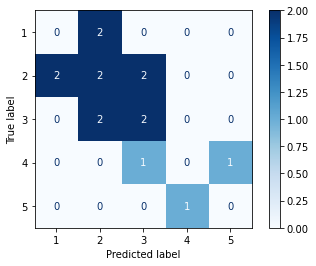

In [13]:
nb = GaussianNB()

param_grid = {'priors': [None]}

nb_best = randomSearchForBestParameter(nb, param_grid, "Naive Bayes", X_train_oversampled, y_train_oversampled)
nb_best.fit(X_train_oversampled, y_train_oversampled)
y_predict = nb_best.predict(X_test)

class_names = list(set(y))
disp = plot_confusion_matrix(nb_best, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

print(classification_report(y_test, y_predict))

### Decision Tree

The best parameters are {'splitter': 'random', 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_depth': 30, 'criterion': 'entropy'}
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.71      0.83      0.77         6
           3       0.50      0.25      0.33         4
           4       0.50      1.00      0.67         2
           5       1.00      1.00      1.00         1

    accuracy                           0.67        15
   macro avg       0.74      0.72      0.69        15
weighted avg       0.69      0.67      0.64        15



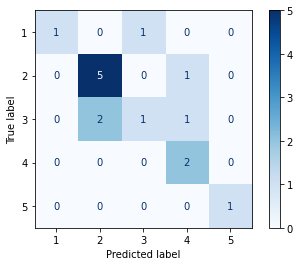

In [14]:
dt = DecisionTreeClassifier()

param_grid = {'criterion': ['entropy'],
              'splitter': ['random'],
              'max_depth': [10, 20, 30],
              'min_samples_split': [10, 20, 30],
              'min_samples_leaf': [2,3,4,5]}

dt_best = randomSearchForBestParameter(dt, param_grid, "Decision Tree", X_train_oversampled, y_train_oversampled)
dt_best.fit(X_train_oversampled, y_train_oversampled)
y_predict = dt_best.predict(X_test)

class_names = list(set(y))
disp = plot_confusion_matrix(dt_best, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

print(classification_report(y_test, y_predict))

### Random Forest

The best parameters are {'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'class_weight': 'balanced', 'bootstrap': False}
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.50      0.83      0.62         6
           3       0.50      0.25      0.33         4
           4       0.67      1.00      0.80         2
           5       0.00      0.00      0.00         1

    accuracy                           0.53        15
   macro avg       0.33      0.42      0.35        15
weighted avg       0.42      0.53      0.45        15



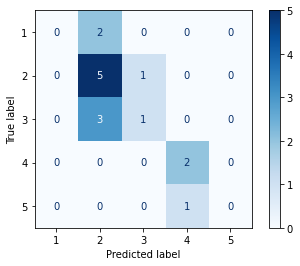

In [15]:
rf = RandomForestClassifier()

param_grid = {'bootstrap': [True, False],
             'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': range(50, 800, 50),
             'class_weight': ['balanced']}

rf_best = randomSearchForBestParameter(rf, param_grid, "Random Forest", X_train_oversampled, y_train_oversampled)
rf_best.fit(X_train_oversampled, y_train_oversampled)
y_predict = rf_best.predict(X_test)

class_names = list(set(y))
disp = plot_confusion_matrix(rf_best, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

print(classification_report(y_test, y_predict))

### Balanced Random Forest

The best parameters are {'random_state': 42, 'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True}
Best: 
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'replacement': False, 'sampling_strategy': 'auto', 'verbose': 0, 'warm_start': False}
              precision    recall  f1-score   support

           1       0.33      0.50      0.40         2
           2       0.40      0.33      0.36         6
           3       0.33      0.25      0.29         4
           4       0.50      1.00      0.67         2
           5       0.00      0.00      0.00         1

    accuracy                           0.40        15
   macro avg   

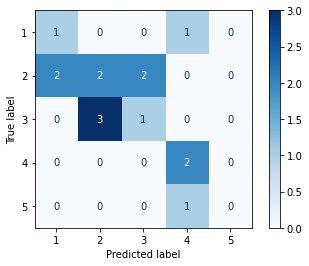

In [16]:
rf = BalancedRandomForestClassifier()

param_grid = {'bootstrap': [True, False],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': range(50, 800, 50),
             'random_state': [42]}

rf_best = randomSearchForBestParameter(rf, param_grid, "Balanced Random Forest", X_train, y_train)
print("Best: ")
print(rf_best.get_params())
rf_best.fit(X_train, y_train)
y_predict = rf_best.predict(X_test)

class_names = list(set(y))
disp = plot_confusion_matrix(rf_best, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

print(classification_report(y_test, y_predict))

In [17]:
list(y_train).count(1), list(y_train).count(2), list(y_train).count(3), list(y_train).count(4), list(y_train).count(5)

(4, 18, 10, 7, 3)

In [26]:
from joblib import dump
dump(dt_best, '/content/drive/My Drive/SelfAssessment/selfassessment_bestDTModel_26June_finalised.pkl')

['/content/drive/My Drive/SelfAssessment/selfassessment_bestDTModel_26June(3).pkl']